In [2]:
import pyfredapi as pf
from dotenv import load_dotenv
load_dotenv()
import os
import matplotlib.pyplot as plt
import pandas as pd
import json

api_key = os.environ.get("api_key")

nfem_data = pf.get_series(series_id="PAYEMS", api_key=api_key)
# adjust unit to million
nfem_data['value'] = nfem_data['value'] / 1000
# calculate difference
nfem_data['change'] = nfem_data['value'] - nfem_data['value'].shift(1)
nfem_data['change'] = nfem_data['change'] * 1000

print(nfem_data)

nfem_info = pf.get_series_info(series_id="PAYEMS", api_key=api_key)

     realtime_start realtime_end       date    value  change
0        2023-05-13   2023-05-13 1939-01-01   29.923     NaN
1        2023-05-13   2023-05-13 1939-02-01   30.100   177.0
2        2023-05-13   2023-05-13 1939-03-01   30.280   180.0
3        2023-05-13   2023-05-13 1939-04-01   30.094  -186.0
4        2023-05-13   2023-05-13 1939-05-01   30.299   205.0
...             ...          ...        ...      ...     ...
1007     2023-05-13   2023-05-13 2022-12-01  154.535   239.0
1008     2023-05-13   2023-05-13 2023-01-01  155.007   472.0
1009     2023-05-13   2023-05-13 2023-02-01  155.255   248.0
1010     2023-05-13   2023-05-13 2023-03-01  155.420   165.0
1011     2023-05-13   2023-05-13 2023-04-01  155.673   253.0

[1012 rows x 5 columns]


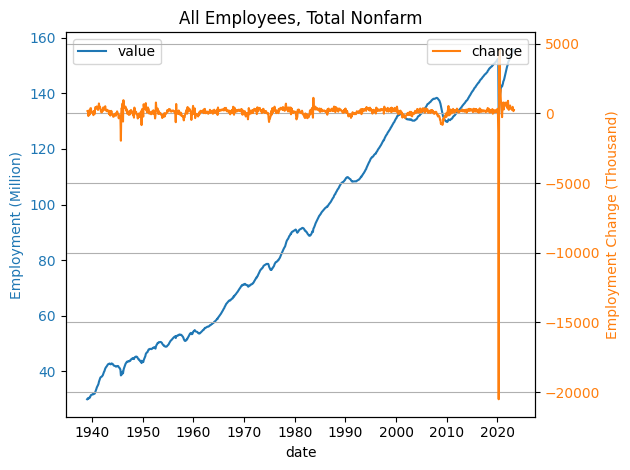

In [14]:
# Create the figure and the first subplot
fig, ax1 = plt.subplots()

# Plot the 'Value' column on the first axis
ax1.plot(nfem_data['date'], nfem_data['value'], color='tab:blue', label='value')
ax1.set_xlabel('date')
ax1.set_ylabel('Employment (Million)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second subplot sharing the x-axis with the first subplot
ax2 = ax1.twinx()

# Plot the 'Change' column on the second axis
ax2.plot(nfem_data['date'], nfem_data['change'], color='tab:orange', label='change')
ax2.set_ylabel('Employment Change (Thousand)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Set titles and legends
plt.title(str(nfem_info.title))
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

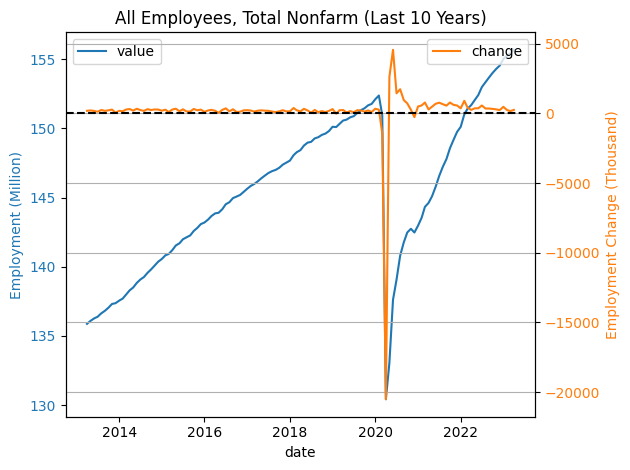

In [17]:
# Filter the DataFrame for the last 10 years
last_10_years_data = nfem_data[nfem_data['date'] >= nfem_data['date'].max() - pd.DateOffset(years=10)]

# Create the figure and the first subplot
fig, ax1 = plt.subplots()

# Plot the 'value' column on the first axis
ax1.plot(last_10_years_data['date'], last_10_years_data['value'], color='tab:blue', label='value')
ax1.set_xlabel('date')
ax1.set_ylabel('Employment (Million)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second subplot sharing the x-axis with the first subplot
ax2 = ax1.twinx()

# Plot the 'change' column on the second axis
ax2.plot(last_10_years_data['date'], last_10_years_data['change'], color='tab:orange', label='change')
ax2.set_ylabel('Employment Change (Thousand)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Set titles and legends
plt.title(str(nfem_info.title) + ' (Last 10 Years)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Convert DataFrame to JSON
nfem_json = nfem_data.to_json(orient='records')

# Parse the JSON
data = json.loads(nfem_json)

# Get the last item
last_item = data[-1]

print(str(nfem_info.title) + ": " + str(last_item['value']) + " Million" + " | Last Updated: " + str(nfem_info.last_updated))
print(str(nfem_info.title) + ": " + str(last_item['change']) + " Thousand" + " | Last Updated: " + str(nfem_info.last_updated))

All Employees, Total Nonfarm: 155.673 Million | Last Updated: 2023-05-05 07:45:01-05
All Employees, Total Nonfarm: 253.0 Thousand | Last Updated: 2023-05-05 07:45:01-05


In [6]:
print("Info: " + str(nfem_info.id))
print("Title: " + str(nfem_info.title))
print("Frequency: " + str(nfem_info.frequency))
print("Units: " + "Million")
print("Last Updated: " + str(nfem_info.last_updated))
print("Popularity: " + str(nfem_info.popularity))
print("Notes: " + str(nfem_info.notes))

Info: PAYEMS
Title: All Employees, Total Nonfarm
Frequency: Monthly
Units: Million
Last Updated: 2023-05-05 07:45:01-05
Popularity: 83
Notes: All Employees: Total Nonfarm, commonly known as Total Nonfarm Payroll, is a measure of the number of U.S. workers in the economy that excludes proprietors, private household employees, unpaid volunteers, farm employees, and the unincorporated self-employed. This measure accounts for approximately 80 percent of the workers who contribute to Gross Domestic Product (GDP).

This measure provides useful insights into the current economic situation because it can represent the number of jobs added or lost in an economy. Increases in employment might indicate that businesses are hiring which might also suggest that businesses are growing. Additionally, those who are newly employed have increased their personal incomes, which means (all else constant) their disposable incomes have also increased, thus fostering further economic expansion.

Generally, the